In [ ]:
# https://unofficed.com/courses/mastering-algotrading-a-beginners-guide-using-kiteconnect-api/lessons/buy-on-rsi-strategy-coding-in-python-using-zerodha/

In [1]:
import logging
from kiteconnect import KiteConnect

logging.basicConfig(level=logging.DEBUG)

kite = KiteConnect(api_key="your_api_key")

# Redirect the user to the login url obtained
# from kite.login_url(), and receive the request_token
# from the registered redirect url after the login flow.
# Once you have the request_token, obtain the access_token
# as follows.

data = kite.generate_session("request_token_here", api_secret="your_secret")
kite.set_access_token(data["access_token"])

/tmp/ipykernel_4126936/1105643221.py:8: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  from kite.kitecustom import *


In [29]:
def get_historical_data(kite, instrument_token, start_date, end_date, interval):
    return kite.historical_data(instrument_token, start_date, end_date, interval, 0)

def calculate_rsi(za):
    rsi_period = 14
    chg = za["close"].diff(1)
    gain = chg.mask(chg < 0, 0)
    loss = chg.mask(chg > 0, 0)
    avg_gain = gain.ewm(com=rsi_period - 1, min_periods=rsi_period).mean()
    avg_loss = loss.ewm(com=rsi_period - 1, min_periods=rsi_period).mean()
    rs = abs(avg_gain / avg_loss)
    rsi = 100 - (100 / (1 + rs))
    za['rsi'] = rsi
    return za.iloc[-1, 6]

def place_order(kite, symbol, quantity, price, transaction_type):
    kite.place_order(
        variety="regular",
        tradingsymbol=symbol,
        quantity=quantity,
        exchange='NSE',
        order_type='LIMIT',
        price=price,
        transaction_type=transaction_type,
        product='CNC'
    )
    print("One order placed")

def livedata():
    while True:
        km = datetime.datetime.now().minute
        ks = datetime.datetime.now().second
        if km % 1 == 0 and ks == 1:
            historical_data = get_historical_data(kite, 857857, "2019-01-05", "2019-06-02", "minute")
            za = pd.DataFrame(historical_data)
            rsi_value = calculate_rsi(za)

            if rsi_value > 30 and za.iloc[-2, 2] > za.iloc[-1, 2]:
                place_order(kite, 'SUNPHARMA', 1, 453, 'BUY')
                break
            else:
                pass
            time.sleep(60)

livedata()


InputException: interval exceeds max limit: 60 days

In [ ]:
# historical_data = get_historical_data(kite, 857857, "2019-01-05", "2019-06-02", "minute")

# I want it to take today and (today - 50 days)

In [7]:
start_date = (datetime.date.today() - datetime.timedelta(days=50)).strftime("%Y-%m-%d")
end_date = datetime.date.today().strftime("%Y-%m-%d")
    
def livedata():
    while True:
        km = datetime.datetime.now().minute
        ks = datetime.datetime.now().second
        if km % 1 == 0 and ks == 1:
            historical_data = get_historical_data(kite, 857857, start_date, end_date, "minute")
            za = pd.DataFrame(historical_data)
            rsi_value = calculate_rsi(za)

            if rsi_value > 30 and za.iloc[-2, 2] > za.iloc[-1, 2]:
                print("RSI Value is " +str(rsi_value))
                place_order(kite, 'SUNPHARMA', 1, 453, 'BUY')
                break
            else:
                pass
            time.sleep(60)

livedata()


RSI Value is 35.53216733131616
One order placed


In [ ]:
# can you write a function to plot the rsi between two dates using this calculate_rsi() fucntion and 
# historical_data = get_historical_data(kite, 857857, start_date, end_date, "minute")

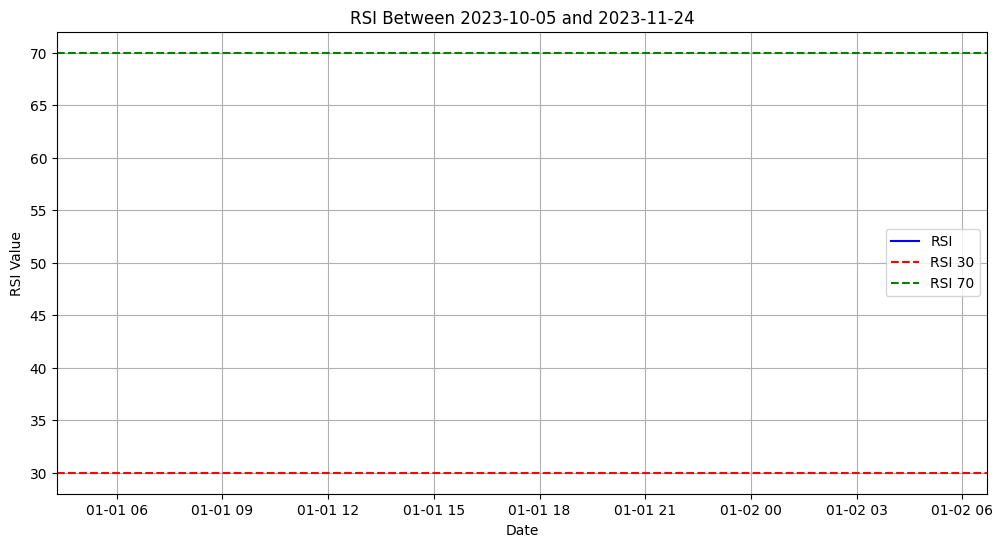

In [15]:
import matplotlib.pyplot as plt

historical_data = get_historical_data(kite, 857857, start_date, end_date, "minute")
za = pd.DataFrame(historical_data)

rsi_values = []  # List to store RSI values

for i in range(len(za)):
    # Create a DataFrame containing a single row from 'za'
    single_row = pd.DataFrame(za.iloc[i]).T
    rsi_value = calculate_rsi(single_row)
    rsi_values.append(rsi_value)

plt.figure(figsize=(12, 6))
plt.plot(za["date"], rsi_values, label="RSI", color='blue')
plt.axhline(y=30, color='red', linestyle='--', label="RSI 30")
plt.axhline(y=70, color='green', linestyle='--', label="RSI 70")
plt.title("RSI Between {} and {}".format(start_date, end_date))
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
za

,date,open,high,low,close,volume
0,2023-10-05 09:15:00+05:30,1124.65,1128.65,1122.80,1124.45,19041
1,2023-10-05 09:16:00+05:30,1125.20,1126.50,1125.05,1126.50,7274
2,2023-10-05 09:17:00+05:30,1126.10,1127.45,1125.50,1127.00,6414
3,2023-10-05 09:18:00+05:30,1127.00,1128.05,1125.85,1125.85,3172
4,2023-10-05 09:19:00+05:30,1125.85,1126.35,1125.00,1125.65,5333
...,...,...,...,...,...,...
13051,2023-11-24 13:16:00+05:30,1194.40,1194.50,1193.35,1193.95,2385
13052,2023-11-24 13:17:00+05:30,1193.95,1194.45,1193.55,1193.70,1695
13053,2023-11-24 13:18:00+05:30,1194.35,1195.00,1193.65,1195.00,5209
13054,2023-11-24 13:19:00+05:30,1195.00,1195.30,1194.05,1194.75,3679


In [17]:
rsi_values

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [19]:
def calculate_rsi_list(df):
    rsi_period = 14
    rsi_values = []

    for i in range(len(df)):
        if i < rsi_period:
            rsi_values.append(None)  # Cannot calculate RSI for the first 14 days
        else:
            chg = df["close"].diff(1)
            gain = chg.where(chg > 0, 0)
            loss = -chg.where(chg < 0, 0)
            avg_gain = gain.iloc[i - rsi_period + 1:i + 1].mean()
            avg_loss = loss.iloc[i - rsi_period + 1:i + 1].mean()
            if avg_loss == 0:
                rsi = 100
            else:
                rs = avg_gain / avg_loss
                rsi = 100 - (100 / (1 + rs))
            rsi_values.append(rsi)

    return rsi_values

rsi_values = calculate_rsi_list(za)
print(rsi_values)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, 39.730639730639666, 30.078124999999943, 26.377952755905184, 27.459016393442283, 32.9457364341083, 39.50177935943041, 41.240875912409294, 43.840579710144745, 44.322344322344435, 43.999999999999666, 44.322344322344435, 38.43416370106739, 38.848920863308756, 21.513944223108012, 35.08771929824533, 38.84297520661151, 39.49579831932781, 41.409691629956676, 37.850467289719845, 37.26415094339563, 35.648148148146845, 39.0350877192979, 47.39130434782545, 56.476683937824085, 56.92307692307779, 55.778894472362374, 60.655737704918444, 71.33757961783407, 67.85714285714286, 61.83206106870202, 63.77952755905532, 71.05263157894643, 61.67664670658586, 55.24475524475518, 60.81081081081126, 52.63157894736933, 44.73684210526421, 50.0, 48.0314960629921, 59.80392156862763, 68.5714285714298, 69.15887850467361, 59.09090909090985, 63.96396396396481, 61.739130434782744, 48.88888888888979, 64.86486486486837, 65.7894736842132, 58.

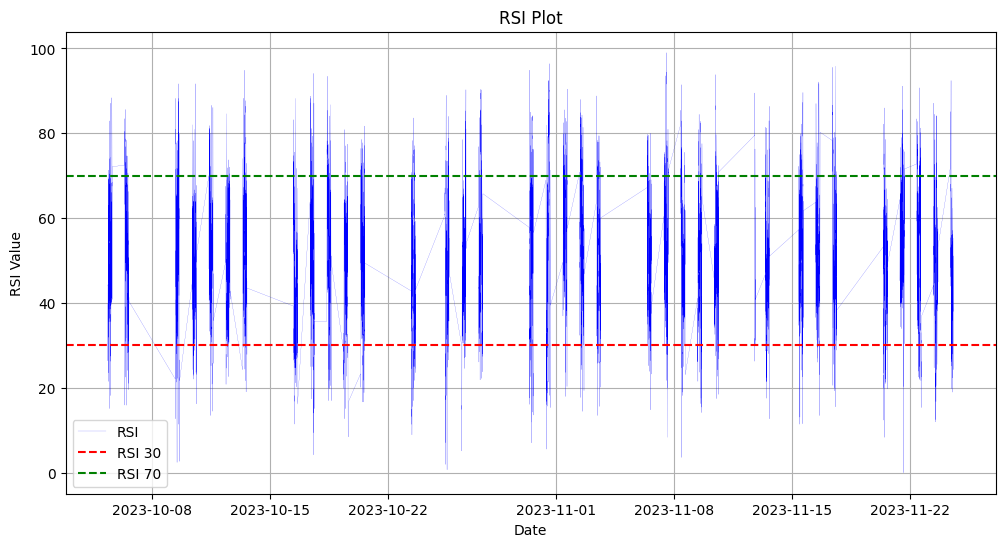

In [24]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the rsi_values using calculate_rsi_list

plt.figure(figsize=(12, 6))
plt.plot(za["date"],rsi_values, label="RSI", color='blue', linewidth=0.1)  
plt.axhline(y=30, color='red', linestyle='--', label="RSI 30")
plt.axhline(y=70, color='green', linestyle='--', label="RSI 70")
plt.title("RSI Plot")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.show()
